<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/SVR-SVM_2-salary_prediction-/blob/main/SVR_SVM_2(salary_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/Salary Data.csv')

In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
df.shape

(375, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip().str.lower()

In [ ]:
df.columns

Index(['age', 'gender', 'education level', 'job title', 'years of experience',
       'salary'],
      dtype='object')

In [ ]:
df.head()

,age,gender,education level,job title,years of experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.isnull().sum()

age                    2
gender                 2
education level        2
job title              2
years of experience    2
salary                 2
dtype: int64

In [ ]:
df[df['age'].isna()]

,age,gender,education level,job title,years of experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

age                    0
gender                 0
education level        0
job title              0
years of experience    0
salary                 0
dtype: int64

In [ ]:
df.head()

,age,gender,education level,job title,years of experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df['education level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df.gender = encoder.fit_transform(df.gender)

In [ ]:
df

,age,gender,education level,job title,years of experience,salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,1,Master's,Director of Operations,19.0,170000.0
372,29.0,0,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,1,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
df['job title'].nunique()

174

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder2 = OneHotEncoder()

In [ ]:
df[["Bachelor's", "Master's", "PhD"]]=encoder2.fit_transform(df['education level'].values.reshape(-1,1)).toarray()

In [ ]:
df=df[['age', 'gender', "Bachelor's", "Master's", 'PhD', 'job title', 'years of experience',
       'salary']]


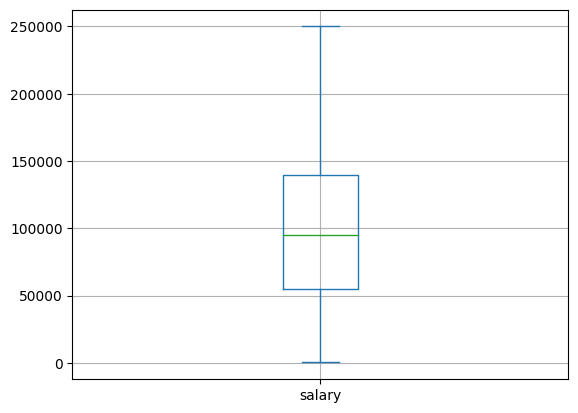

In [ ]:
df.salary.plot.box()
plt.grid()

<Axes: >

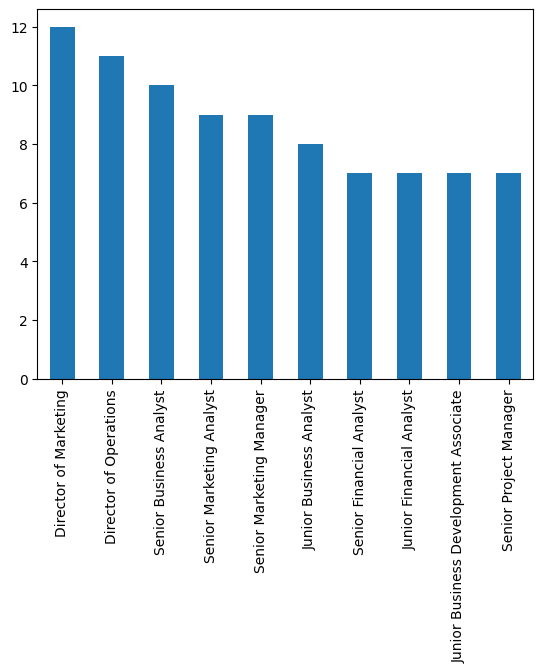

In [ ]:
df['job title'].value_counts().head(10).plot.bar()

<Axes: >

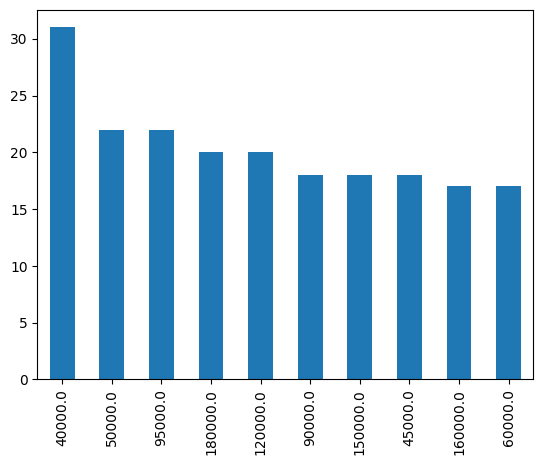

In [ ]:
df['salary'].value_counts().head(10).plot.bar()

<Axes: xlabel='years of experience'>

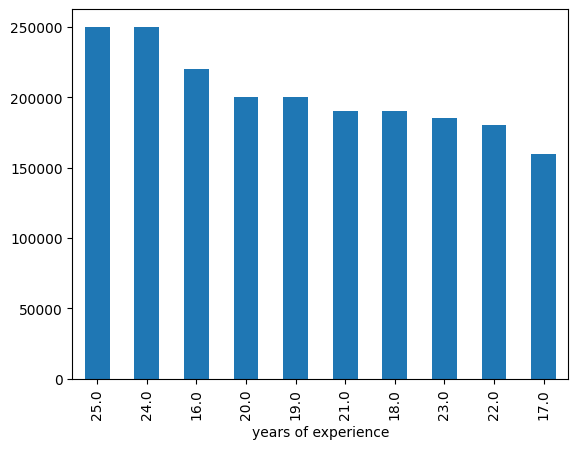

In [ ]:
df.groupby(['years of experience'])['salary'].max().sort_values(ascending=False).head(10).plot.bar()

<Axes: xlabel='salary'>

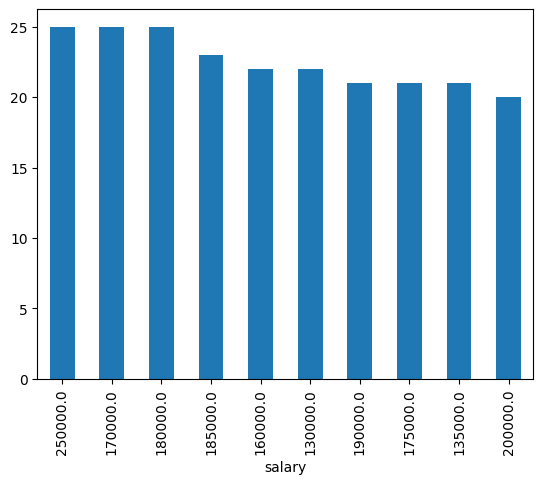

In [ ]:
df.groupby(['salary'])['years of experience'].max().sort_values(ascending=False).head(10).plot.bar()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


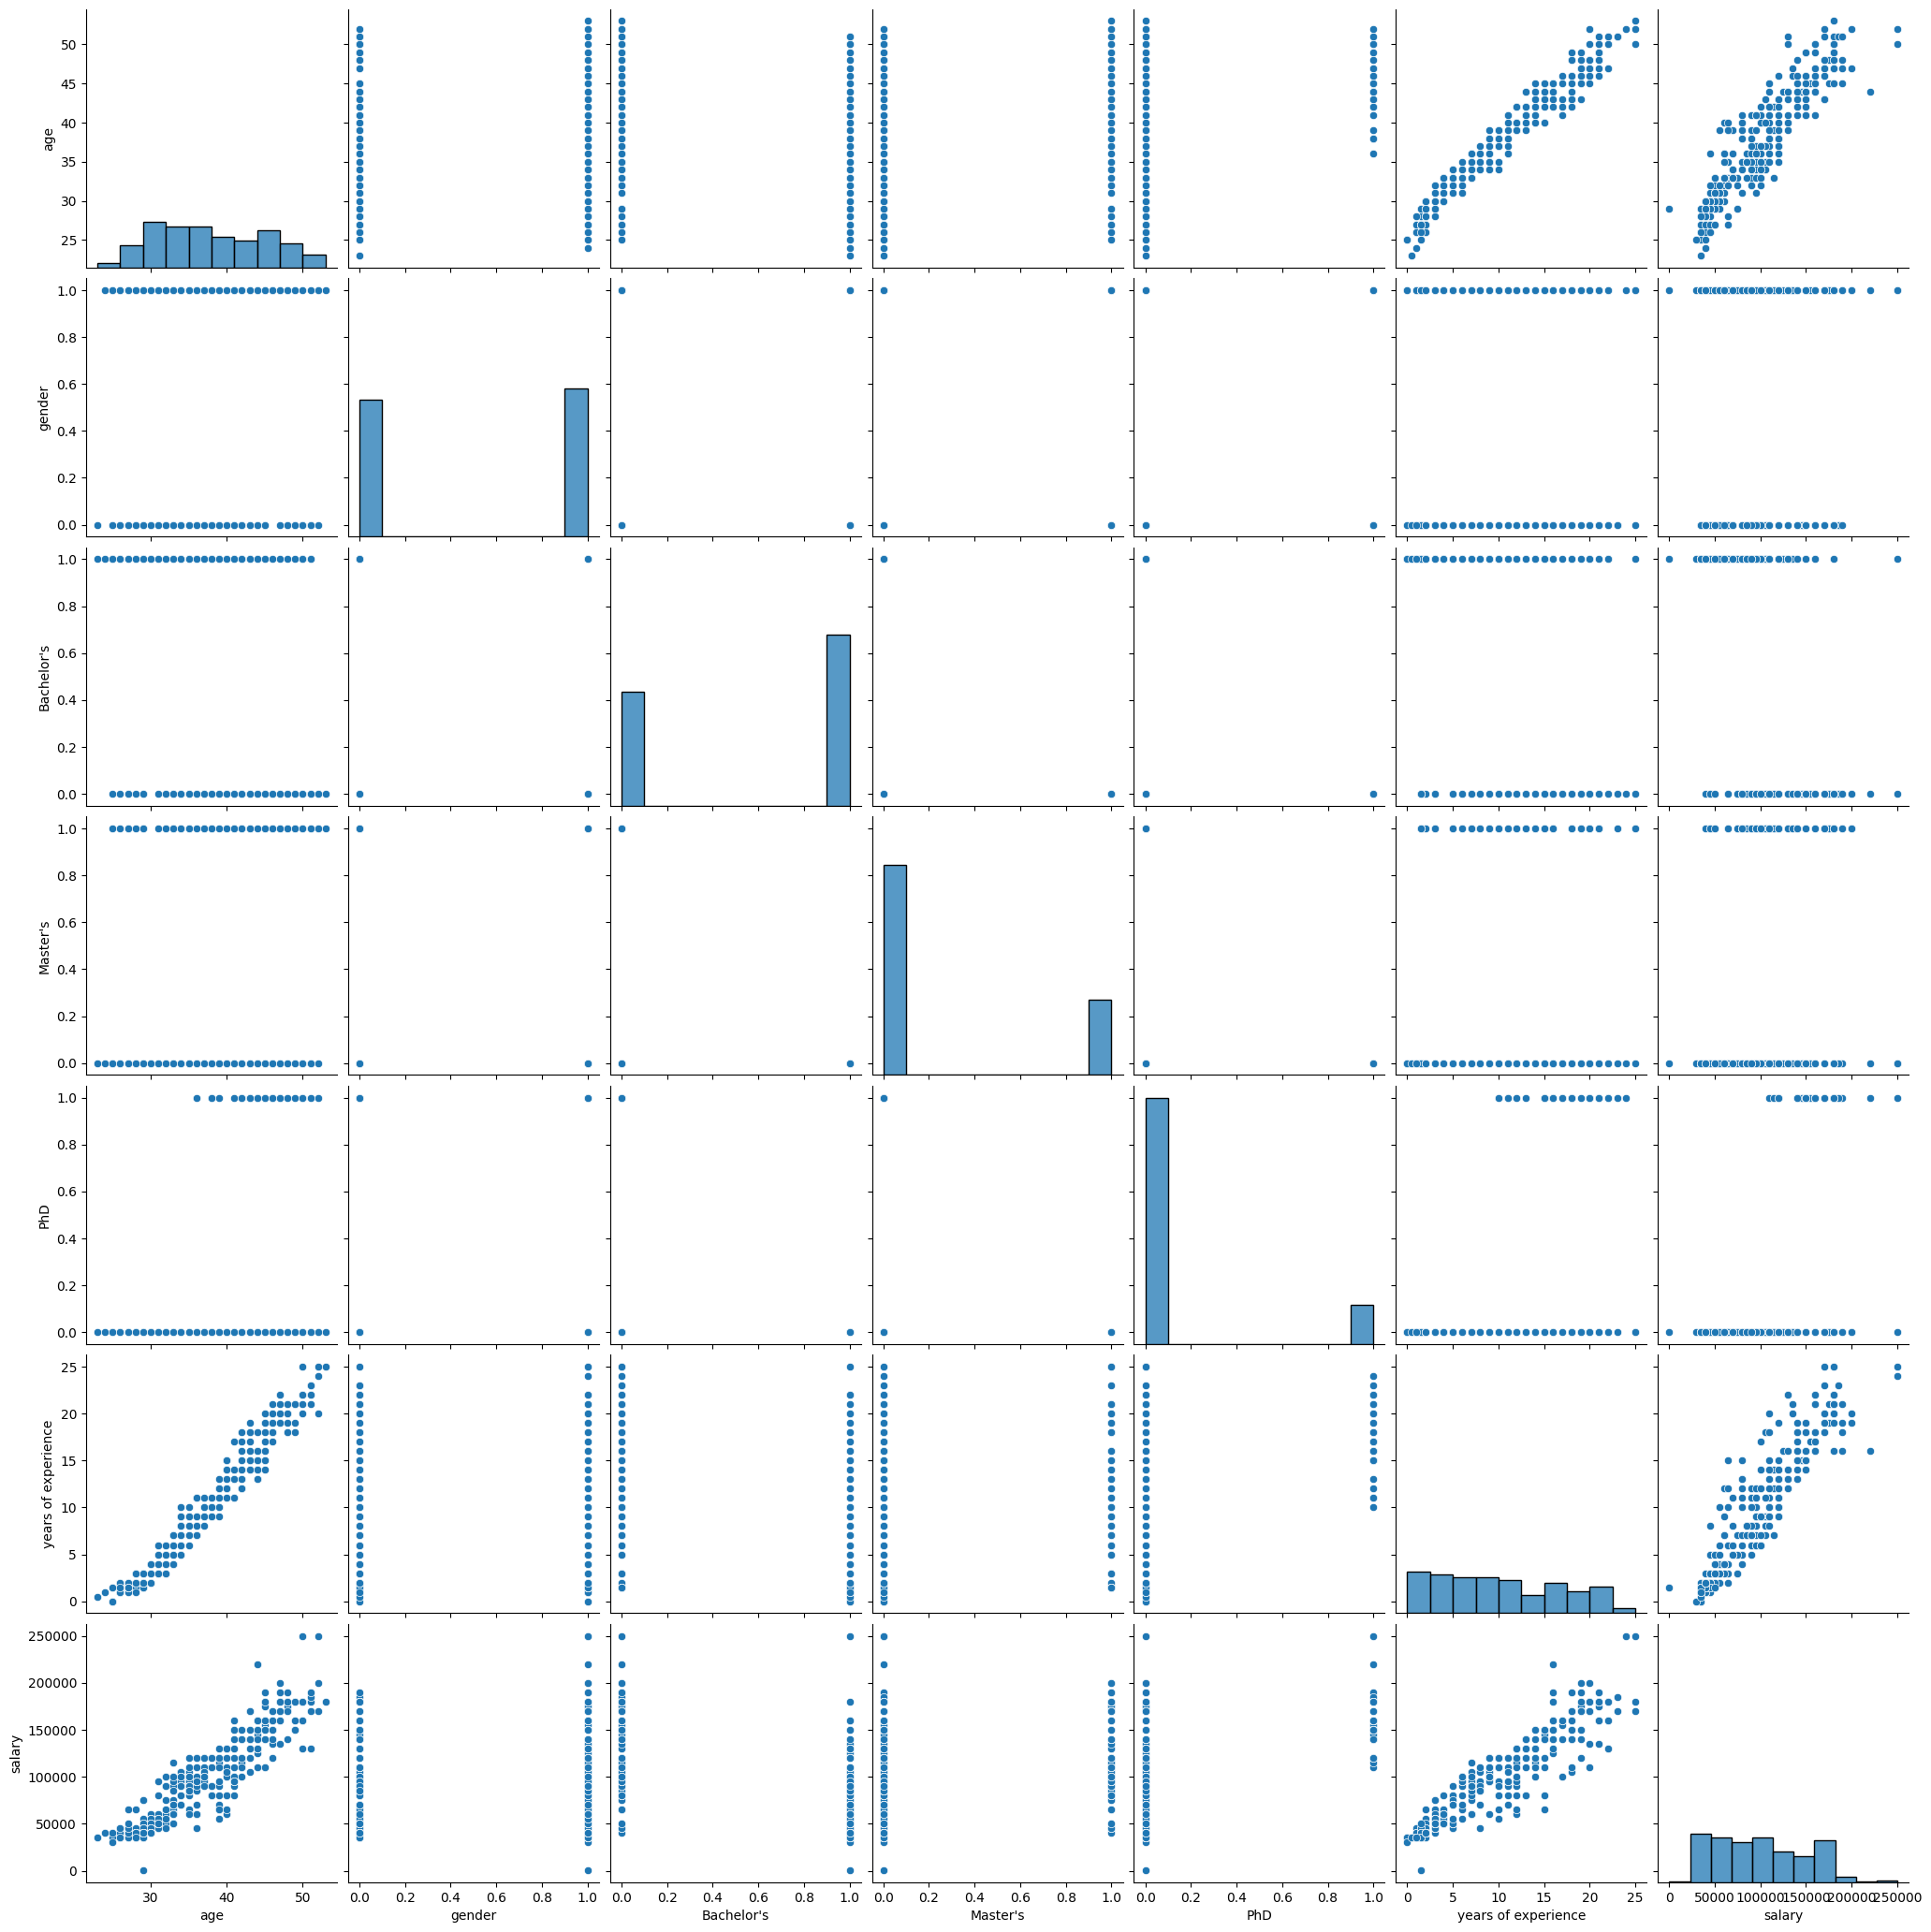

In [ ]:
# Plot a pairplot
sns.pairplot(df,size=3)

<ipython-input-25-2be9f7f04de2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

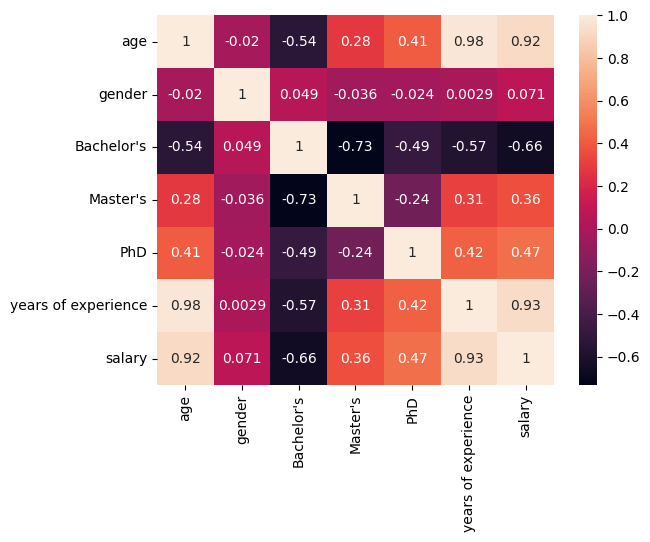

In [ ]:
# Plot a heatmap
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop(['job title'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[32.,  1.,  1.,  0.,  0.,  5.],
       [28.,  0.,  0.,  1.,  0.,  3.],
       [45.,  1.,  0.,  0.,  1., 15.],
       ...,
       [29.,  0.,  1.,  0.,  0.,  2.],
       [34.,  1.,  1.,  0.,  0.,  7.],
       [44.,  0.,  0.,  0.,  1., 15.]])

In [ ]:
stanscale = StandardScaler()

In [ ]:
X = stanscale.fit_transform(X)
y = stanscale.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=10)

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
y_pred

array([[159525.26226234],
       [159609.65681209],
       [178762.7942828 ],
       [166839.82119977],
       [174670.77146309],
       [ 82554.24731418],
       [ 99975.91662821],
       [ 39938.86879408],
       [132016.16557722],
       [171511.49030314],
       [109442.37978944],
       [ 99436.48878356],
       [116877.36228792],
       [145864.23311566],
       [120414.53007844],
       [ 63540.73881217],
       [142989.83544013],
       [ 98668.99019083],
       [135102.35685826],
       [ 63598.33252899],
       [114670.65325567],
       [127538.9149757 ],
       [ 96845.83406505],
       [ 82928.30676751],
       [150661.21420724],
       [171357.70123521],
       [ 36112.18399213],
       [160922.53503617],
       [ 59987.97428409],
       [176554.3688627 ],
       [ 57563.42738434],
       [120248.41875338],
       [100463.59804638],
       [ 94707.32482447],
       [ 88238.33205393],
       [ 36112.18399213],
       [180523.97303912],
       [ 57591.43892533],
       [ 802

In [ ]:
y_test = stanscale.inverse_transform(y_test)

In [ ]:
y_test

array([[140000.],
       [160000.],
       [180000.],
       [180000.],
       [190000.],
       [ 95000.],
       [110000.],
       [ 40000.],
       [160000.],
       [180000.],
       [120000.],
       [ 90000.],
       [120000.],
       [150000.],
       [150000.],
       [ 60000.],
       [180000.],
       [100000.],
       [140000.],
       [ 70000.],
       [130000.],
       [140000.],
       [ 95000.],
       [ 45000.],
       [150000.],
       [180000.],
       [ 35000.],
       [170000.],
       [ 65000.],
       [135000.],
       [ 60000.],
       [140000.],
       [ 80000.],
       [ 95000.],
       [ 60000.],
       [ 35000.],
       [180000.],
       [ 45000.],
       [ 85000.],
       [150000.],
       [ 60000.],
       [ 35000.],
       [140000.],
       [ 65000.],
       [160000.],
       [150000.],
       [180000.],
       [ 40000.],
       [110000.],
       [110000.],
       [120000.],
       [ 90000.],
       [ 65000.],
       [ 60000.],
       [170000.],
       [ 8

In [ ]:
r2_score(y_test, y_pred)

0.8757853608574918